<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/Lecture_3_2_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%BD%D1%8F_%D1%80%D0%BE%D0%B7%D0%BC%D1%96%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В машинному навчанні методи пониження розмірності мають низку практичних застосувань, включаючи
- приховування конфіденційних даних,
- усунення мультиколінеарності,
- видалення шуму з наборів даних
- та візуалізацію високовимірних даних шляхом зменшення їх до двох або трьох вимірів, які можна відобразити на графіку.


### Принцип роботи PCA
Principal component analysis, PCA — це лінійний метод пониження розмірності, що знижує розмірність даних шляхом проектування їх на новий простір з меншою кількістю осей (головних компонент), які є лінійними комбінаціями початкових ознак. Мета PCA — знайти напрямки (головні компоненти), уздовж яких варіація в даних максимальна. Цей метод ефективний для збереження глобальних структур у даних і корисний, коли ви хочете зберегти основні тенденції або варіації в даних.

Основні кроки PCA:
1. Центрування даних шляхом віднімання середнього.
2. Визначення коваріаційної матриці даних.
3. Обчислення власних векторів та власних значень коваріаційної матриці.
4. Вибір власних векторів з найбільшими власними значеннями для створення нового підпростору (з меншою розмірністю).
5. Проєктування даних на цей новий підпростір.


Ось приклад PCA для перетворення 2D-даних в 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

PCA безпосередньо не робить моделі машинного навчання більш точними, але може допомогти їм швидше навчатися та краще узагальнювати. І PCA легко виконати за допомогою класу [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) з бібліотеки Scikit.

PСА має нескладний принцип дії, тож ми закодимо його вручну. Але спочатку  запустимо з sklearn аби глибше зрозуміти, що дає використання цього алгоритму.


## Інтерпретація PCA

Щоб зрозуміти, що таке PCA і як воно працює, почнемо з використання його для зменшення 2-вимірного набору даних до одного виміру. Першим кроком є створення набору даних, що складається з пар координат *x* та *y*, які приблизно утворюють лінію.

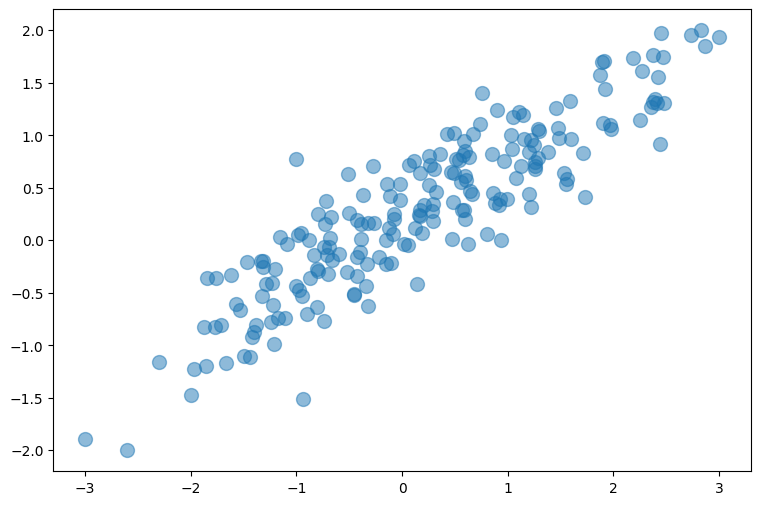

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_regression(n_samples=200, n_features=1, noise=50, random_state=0)
x = np.interp(x, (x.min(), x.max()), (-3, 3))
y = np.interp(y, (y.min(), y.max()), (-2, 2))
xy = np.column_stack((x, y))

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)

Використовуємо PCA (метод головних компонент) для знаходження двох головних компонент у наборі даних.

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(xy)

PCA(n_components=2)

Тепер побудуємо два головні компоненти. Перший компонент - це вісь, яка містить більшість інформації. Другий компонент - це вісь, яка містить залишкову інформацію. Оскільки точки даних приблизно утворюють лінію, перший компонент лежить уздовж цієї лінії.

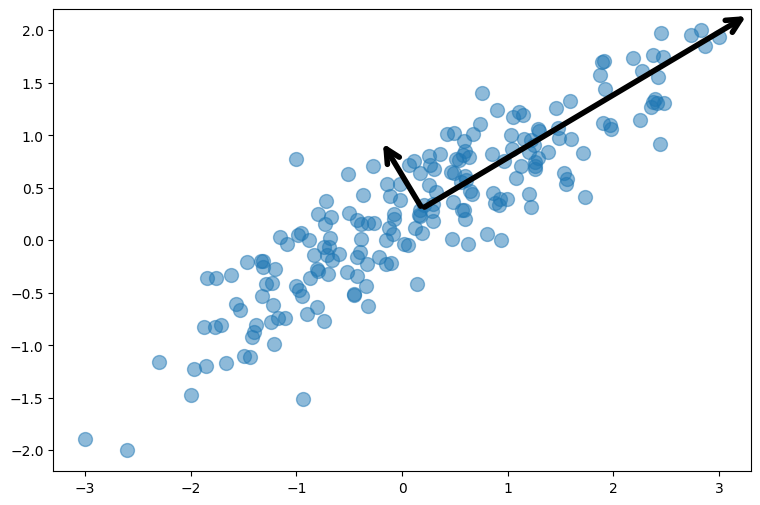

In [3]:
def draw_vector(v0, v1):
    ax = plt.gca()
    props = dict(arrowstyle='->', linewidth=4, mutation_scale=25)
    ax.annotate('', v1, v0, arrowprops=props)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)

for len_, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, pca.mean_ + (vector * 2.5 * np.sqrt(len_)))

Використаймо атрибут `explained_variance_ratio_` класу `PCA`, щоб кількісно оцінити кількість інформації, що міститься в кожному компоненті.

In [4]:
pca.explained_variance_ratio_

array([0.95860561, 0.04139439])

Більше 95% інформації в наборі даних міститься на одній осі (головна компонента). Використаймо PCA (метод головних компонент) для зменшення набору даних до однієї головної компоненти.

In [5]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(xy)

Тепер спроєктуємо всі точки даних на вісь головного компонента, інвертуючи перетворення PCA (Principal Component Analysis), відновлюючи перетворені дані до двох вимірів з інформацією лише з першого виміру. Оригінальні точки показані синім кольором, а спроєктовані точки показані помаранчевим.

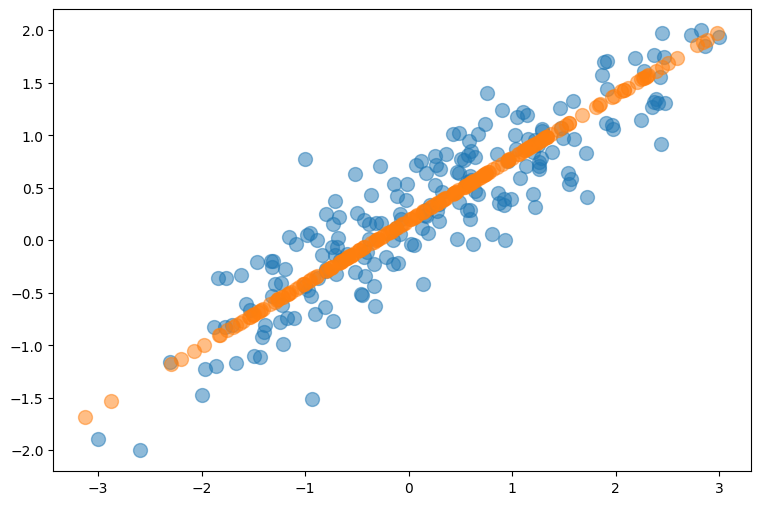

In [6]:
unpca_data = pca.inverse_transform(pca_data)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)
plt.scatter(unpca_data[:, 0], unpca_data[:, 1], s=100, alpha=0.5)

Ви можете побачити, що помаранчеві точки зберігають більшу частину інформації, що міститься в синіх точках, навіть незважаючи на те, що розмір набору даних було зменшено вдвічі (з двох вимірів до одного). Це і є суть PCA (Principal Component Analysis): зменшення кількості вимірів без відповідної втрати інформації.

## PCA з зображеннями облич

Цікавий спосіб візуалізувати, як PCA (Principal Component Analysis) може зменшити розміри набору даних, зберігаючи при цьому більшу частину інформації, - це застосувати його до набору даних Labeled Faces in the Wild (LFW). Спочатку ми завантажимо набір даних і зменшимо кількість вимірів на 95%. Потім ми інвертуємо перетворення PCA, щоб візуалізувати, як мало було втрачено оригінальної інформації.

In [7]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


Побудуємо графік перших 24 зображень у наборі даних разом з їхніми мітками.

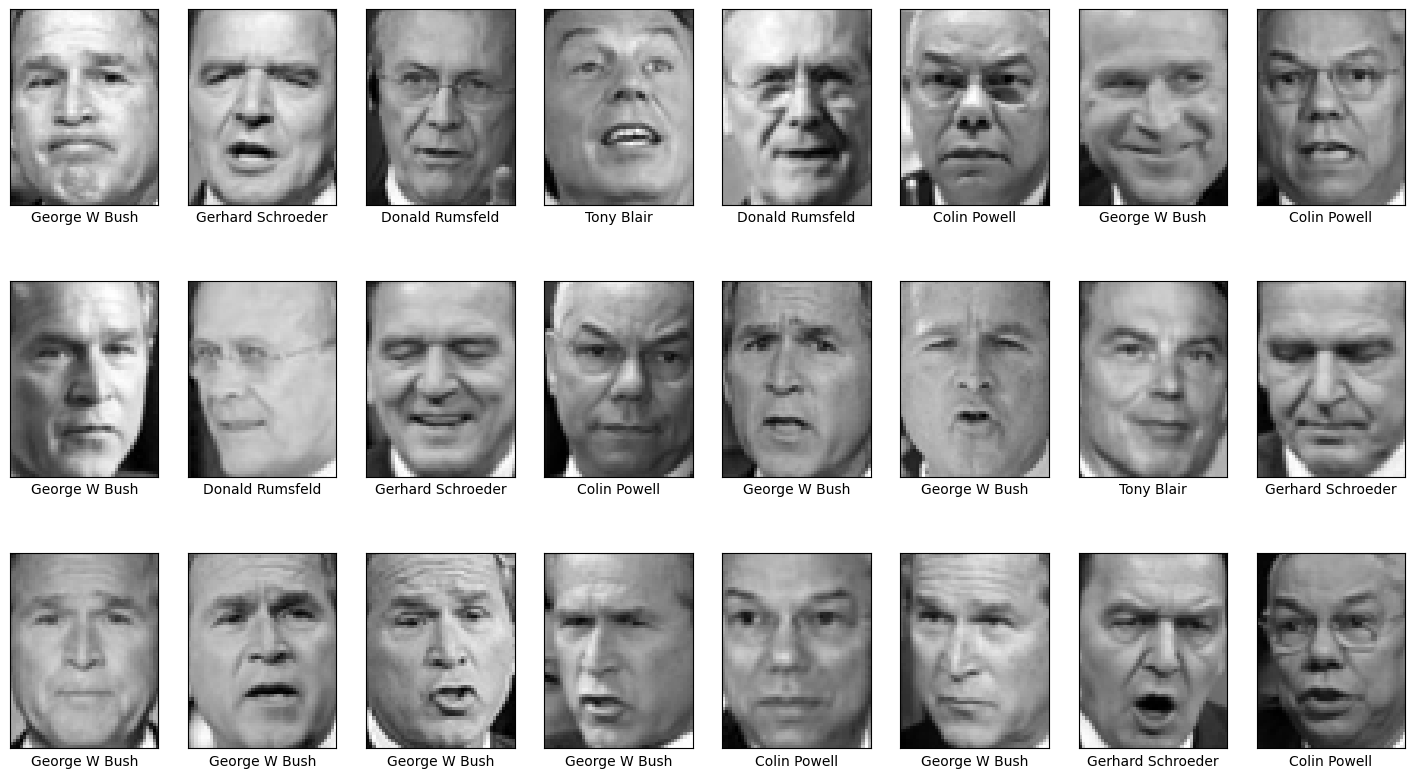

In [8]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Тепер зменшимо 2,914 вимірів (62 x 47) до 150 за допомогою PCA (метод головних компонент) і інвертуємо перетворення, щоб відновити зображення облич.

In [9]:
pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

Відновлені зображення облич:

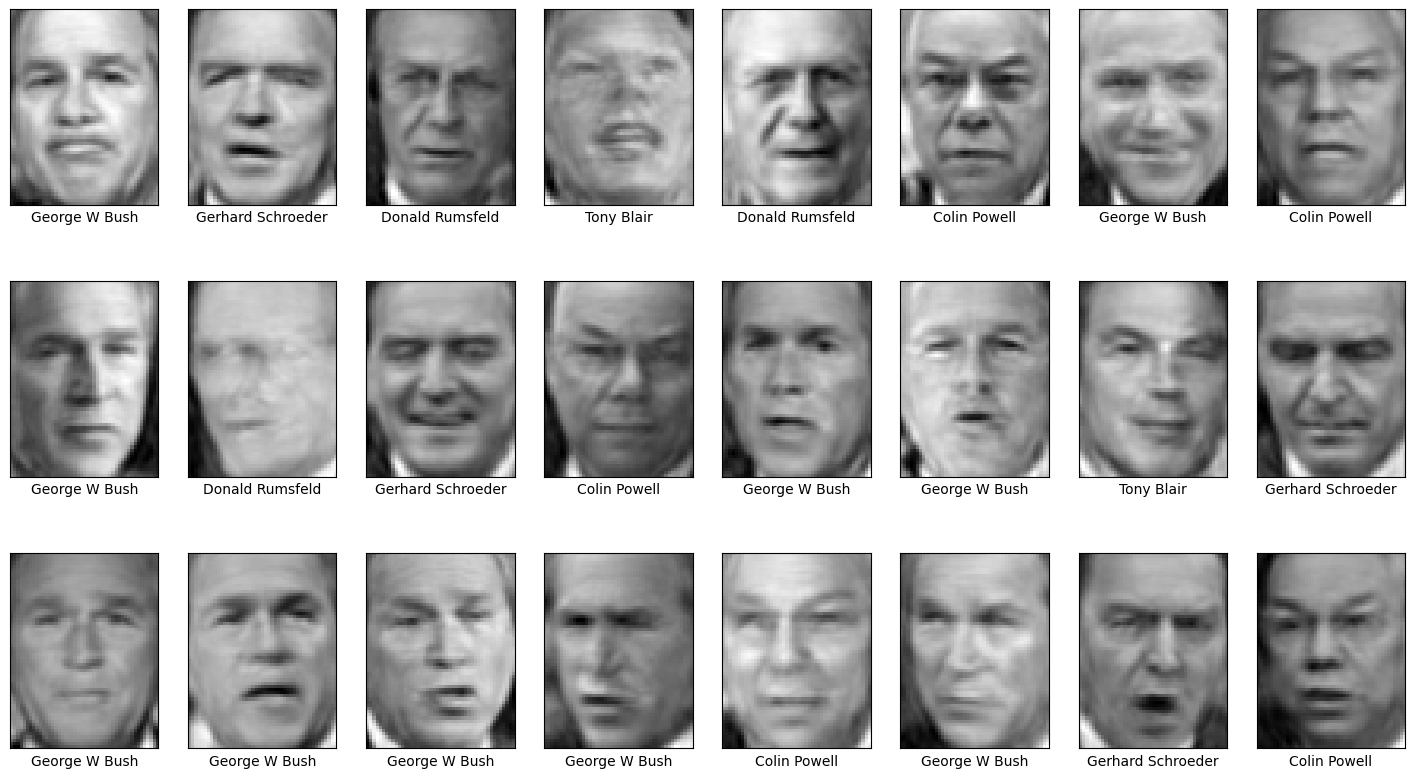

In [10]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Порівняйте зображення до і після. Чи виглядає так, ніби 95% інформації було відкинуто? Насправді, ви можете обчислити, скільки оригінальної інформації було збережено, підсумовуючи пояснені дисперсії (explained variances). У цьому випадку це майже 95%:

In [11]:
np.sum(pca.explained_variance_ratio_)

np.float32(0.9383234)

Логічне питання, яке варто поставити, це яка "правильна" кількість компонентів? Іншими словами, яка кількість компонентів забезпечує найкращий баланс між зменшенням кількості вимірів у наборі даних та збереженням більшості інформації? Один зі способів відповісти на це питання - це графік осипу (scree plot), який показує частку поясненої дисперсії для кожного виміру. Ось графік осипу для перетворення PCA, використаного на зображеннях облич.

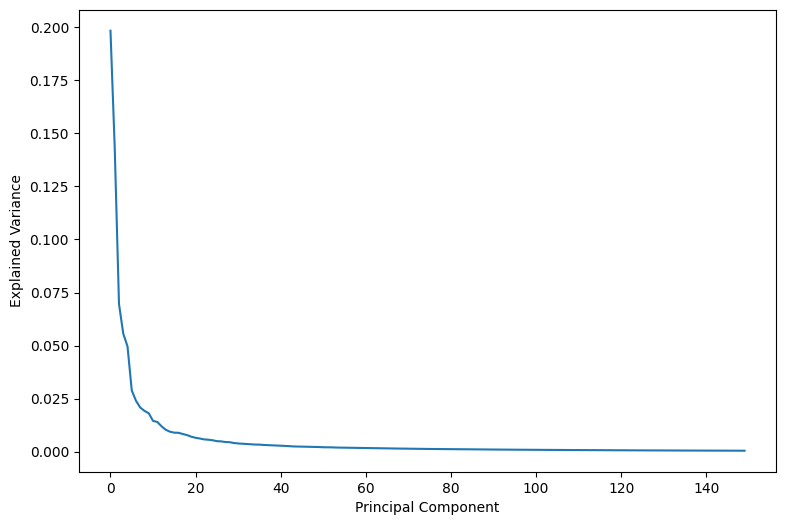

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance');

Інший спосіб поглянути на це - побудувати графік суми пояснених дисперсій як функції кількості компонентів.

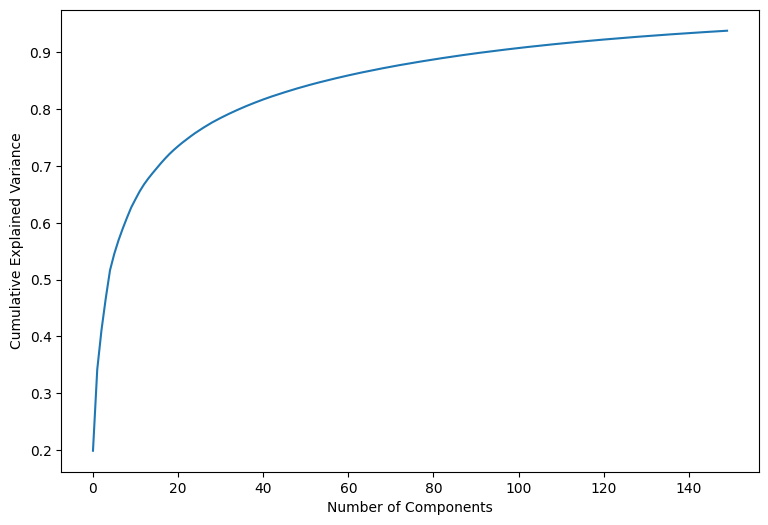

In [13]:
plt.figure(figsize=(9, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

Виходячи з цих графіків, якщо б ви зменшили кількість вимірів до 50 замість 150, чи очікували б ви, що відновлені зображення облич будуть виглядати суттєво інакше? Якщо ви не впевнені, спробуйте це зробити і подивіться.

## Використання PCA на практиці: зменшення шуму

Одним із практичних застосувань PCA є фільтрація шуму з даних. Основний підхід полягає в тому, щоб перетворити набір даних за допомогою PCA, а потім виконати зворотне перетворення, перетворюючи набір даних з *m* вимірів до *n* і потім назад до *m*. Тут ми демонструємо це, штучно додаючи шум до набору даних рукописних цифр, включеного до Scikit-learn. Цей набір даних містить 1,797 зображень, кожне з яких є 8x8 масивом чисел, що складають 64 виміри. Почнемо з завантаження набору даних і показу перших 50 зображень.

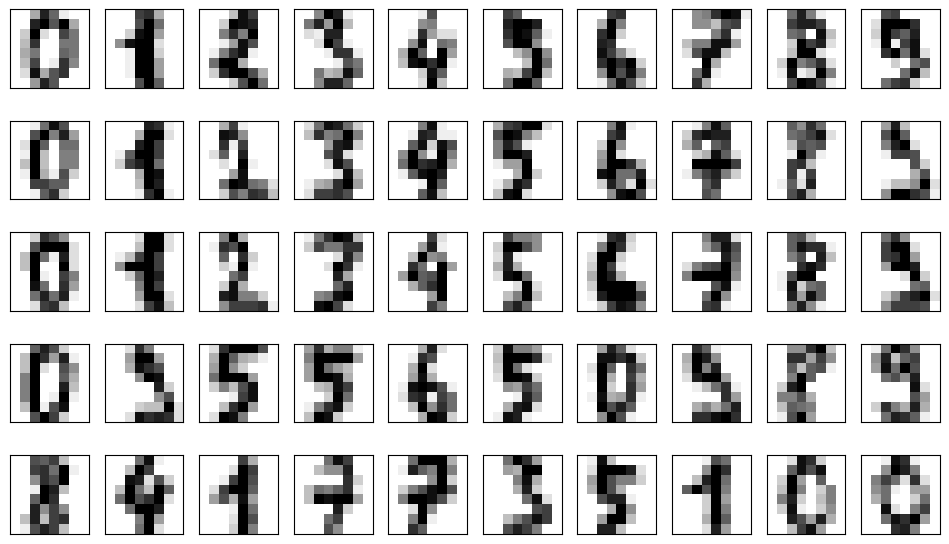

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)

Введіть випадковий шум у набір даних і побудуйте графік результатів.

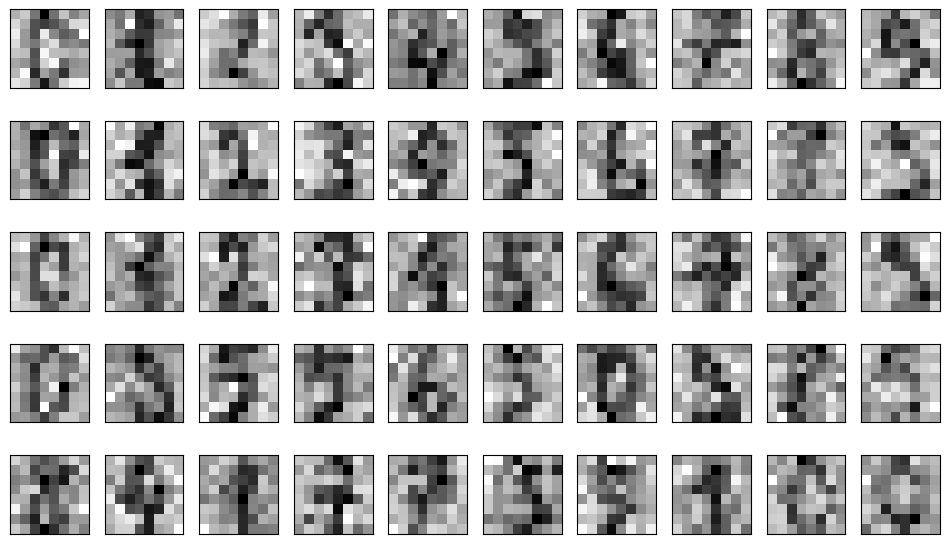

In [15]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(noisy[i].reshape(8, 8), cmap=plt.cm.gray_r)

Використаймо PCA для зменшення кількості вимірів. Замість того, щоб вказувати кількість вимірів (компонент), ми вкажемо, що хочемо зменшити кількість інформації в наборі даних до 50%. Ми дозволимо Scikit learn вирішити, скільки вимірів залишиться, а потім покажемо їх кількість.

In [16]:
pca = PCA(0.5, random_state=0).fit(noisy)
pca.n_components_

np.int64(12)

PCA зменшив кількість вимірів з 64 до 12, але 12 залишених вимірів містять 50% інформації з оригінальних 64. Тепер реконструююємо набір даних зі зменшеної версії.

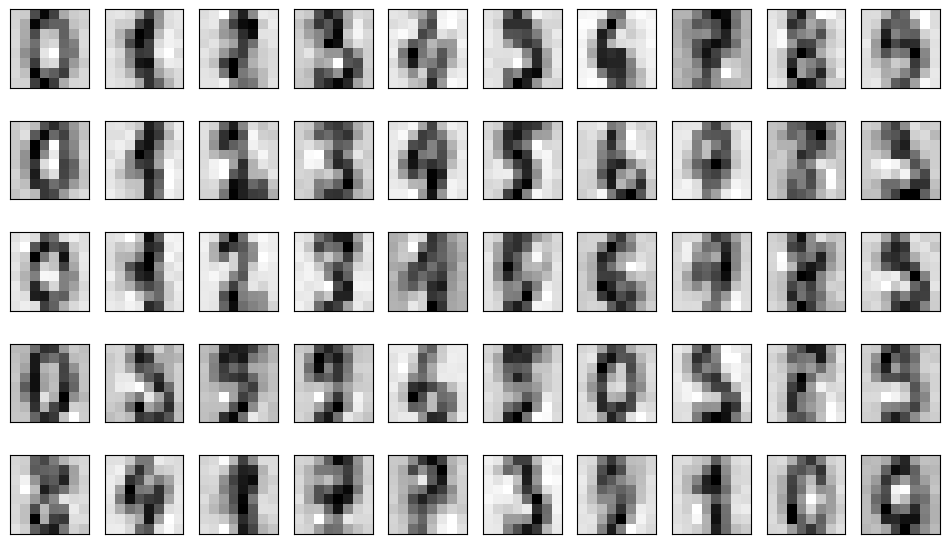

In [17]:
pca_digits = pca.transform(noisy)
unpca_digits = pca.inverse_transform(pca_digits)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(unpca_digits[i].reshape(8, 8), cmap=plt.cm.gray_r)

Відновлений набір даних не такий чистий, як оригінал, але достатньо чистий, щоб можна було розібрати більшість чисел.

## Візуалізація багатовимірних даних

Ще одне практичне застосування PCA (метод головних компонент) — це візуалізація багатовимірних даних. Більшість моделей машинного навчання тренуються на наборах даних, що містять багато вимірів. Наприклад, набір даних зображень розміром 100x100 пікселів містить 10,000 вимірів. Люди можуть візуалізувати дані лише у двох або максимум трьох вимірах. Використання PCA для зменшення сотень (або тисяч) вимірів до двох або трьох, а потім побудова графіку зменшеного набору даних допомагає нам візуалізувати кластери даних у багатовимірних наборах даних. Ми продемонструємо це, використовуючи PCA для зменшення цифр, використаних у попередньому прикладі, спочатку до двох, а потім до трьох вимірів і побудови графіків результатів.

Почнемо з завантаження набору даних, зменшення його до двох вимірів і побудови графіку результату.

/tmp/ipython-input-1611256271.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))


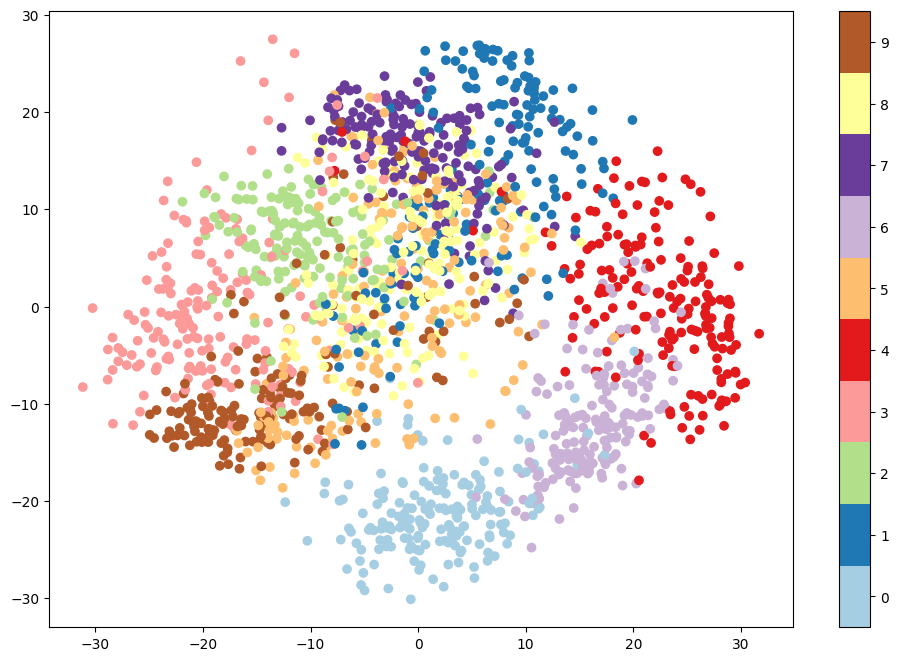

In [18]:
digits = load_digits()
pca = PCA(n_components=2, random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

Зведені до двох вимірів, цифри утворюють дещо окремі кластери, хоча з деяким перекриттям. 0, представлені світло-блакитними точками, здається, мають мало перекриття з іншими цифрами, тоді як 9 і 5 демонструють деяку схожість, принаймні при розгляді у двох вимірах. Давайте спробуємо зменшити набір даних до трьох вимірів замість двох, щоб побачити, чи буде додаткове розділення очевидним з додатковим виміром.

In [19]:
import pandas as pd
import plotly.express as px

pca = PCA(n_components=3, random_state=0)
pca_digits = pca.fit_transform(digits.data)

# Create a DataFrame for Plotly Express
df = pd.DataFrame(data=pca_digits, columns=['PC1', 'PC2', 'PC3'])
df['target'] = digits.target

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    hover_data='target',
    color='target',
    title='3D Scatter Plot of Digits Dataset with PCA'
)

# Show the figure
fig.show()

Виходячи з цієї візуалізації, чи ймовірно, що модель машинного навчання може бути навчена розрізняти рукописні цифри з високим ступенем точності? Зверніть увагу, що якщо обертати графік навколо різних осей, можна знайти розумний ступінь розділення між будь-якими кластерами.

Додатково можна візуалізовувати такі дані прямо з картинками! Не факт, що запуститься в ноутбуці, але можна це зробити в сторонньому сервісі тут
https://projector.tensorflow.org/

А ось інструкція від мене як то робити (трохи застаріла, та напрям ідеї може бути цікавим :))
https://medium.com/@hanna-shares/how-to-visualize-image-feature-vectors-1e309d45f28f

А тут можна переглянути статтю-аналіз щодо якості кластеризації на картинках і тут застосовується зменшення розмірності перед кластеризацією аби легше було тренувати PCA https://towardsdatascience.com/k-means-and-pca-for-image-clustering-a-visual-analysis-8e10d4abba40


## PCA вручну

Завантажимо табличний високорозмірний набір даних.

In [20]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

df_wine = load_wine(return_X_y=True, as_frame=True)
df_wine = pd.concat([df_wine[1], df_wine[0]], axis=1)

In [21]:
df_wine.shape

(178, 14)

In [22]:
df_wine

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# розділимо на тренувальний і тест набори
X, y = df_wine.drop(columns='target'), df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
# рахуємо матрицю коваріації і для неї шукаємо власні числа і вектори

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [25]:
eigen_vals.shape

(13,)

In [26]:
# рахуємо суму відхилень

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

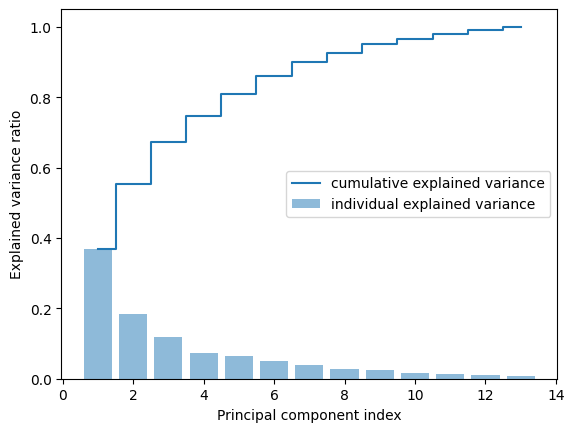

In [30]:
# візуалізуємо відсоток пояснених варіацій в залежності від обраної меншої розмірності даних

plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Трансформація ознак - перевод з високорозмірного простору у низькорозмірний.

In [31]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Сортуємо пари власних чисел і векторів
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [32]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [33]:
w.shape, X_train_std.shape

((13, 2), (124, 13))

In [34]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [35]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [36]:
X_train_pca = X_train_std.dot(w)

Наші дані по класах на 2D площині.

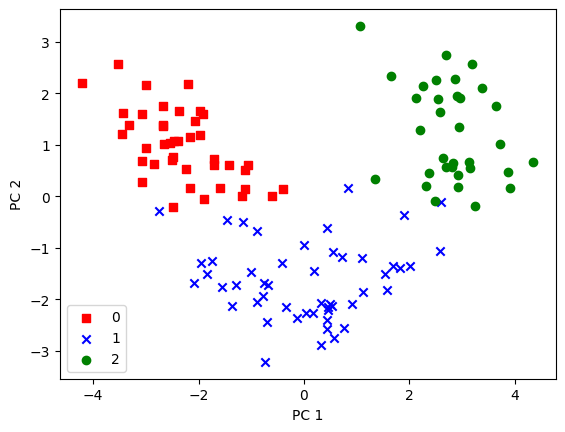

In [37]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [38]:
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['target'] = y_train.reset_index(drop=True)

fig = px.scatter(
    df,
    x='PC1',
    y='PC2',
    color='target',
    hover_data='target',
    title='2D Scatter Plot of PCA Components',
    labels={'target': 'Class'}
)


fig.show()

## Візуалізація даних за допомогою t-SNE

PCA не є єдиним способом зменшення розмірності даних.

Manifold learning - це підхід до нелінійного зменшення розмірності. Алгоритми для цієї задачі базуються на ідеї, що розмірність багатьох наборів даних є лише штучно високою. Scikit-learn надає багато алгоритмів для Manifold learning: https://scikit-learn.org/stable/modules/manifold.html . Найпоширенішою технікою Manifold learning є [t-distributed stochastic neighbor embedding](https://uk.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), або t-SNE, яка часто використовується для візуалізації даних високої розмірності в одному, двох або трьох вимірах.

На відміну від PCF t-SNE має інший пронцип роботи і дещо інші цілі. Наприклад, для зменшення шуму в даних все ж використовують частіше РСА, а от t-SNE саме для візуалізації.

### Принцип роботи t-SNE
t-SNE — це нелінійний метод зниження розмірності, який зосереджується на збереженні локальних структур даних. Він перетворює високовимірні дані у простір з меншою кількістю вимірів (зазвичай 2 або 3), намагаючись зберегти подібність між точками в локальному оточенні.

Основні кроки t-SNE:
1. Для кожної точки в оригінальному високовимірному просторі t-SNE обчислює ймовірність того, що інші точки є сусідами, використовуючи гаусівський розподіл (який залежить від відстані між точками).
2. t-SNE намагається відобразити ці ймовірності в просторі меншої розмірності, використовуючи розподіл Стьюдента (t-розподіл), що дозволяє краще відобразити взаємодію між точками на коротких відстанях.
3. Алгоритм мінімізує різницю між ймовірностями у високовимірному просторі та ймовірностями у просторі меншої розмірності, щоб зберегти локальні структури.

Ось візуальне представлення t-SNE, що застосовується для візуалізації двовимірних даних в одному вимірі:

<img src="https://i.imgur.com/rVMAaix.png" width="360">

Ось візуальне представлення t-SNE, застосоване до набору даних MNIST, який містить зображення рукописних цифр від 0 до 9 розміром 28px x 28px, що зменшує кількість вимірів з 784 до 2 ([джерело](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://i.imgur.com/kpD7d2a.png" width="640">

Ось відео, що пояснює, як працює t-SNE: https://www.youtube.com/watch?v=NEaUSP4YerM

### Принципова відмінність між t-SNE та PCA
1. **Лінійність проти нелінійності**: PCA є лінійним методом, тоді як t-SNE — нелінійний, що дозволяє t-SNE краще зберігати локальні структури у даних, які можуть бути сильно нелінійними.
   
2. **Збереження глобальних проти локальних структур**: PCA фокусується на збереженні глобальних варіацій у даних, тоді як t-SNE більше орієнтований на збереження локальних подібностей між точками.

3. **Швидкість та масштабованість**: PCA зазвичай швидше обчислюється і може бути застосований до дуже великих наборів даних, тоді як t-SNE є обчислювально більш інтенсивним і може страждати від проблем масштабованості при роботі з дуже великими даними.

4. **Інтерпретація результатів**: Результати PCA можуть бути більш інтерпретованими, оскільки кожна головна компонента є лінійною комбінацією початкових ознак. Результати t-SNE складніше інтерпретувати, оскільки знижена розмірність не має такого ж значення, як у PCA, і більше зосереджена на відображенні відносної відстані між точками.

Таким чином, PCA краще підходить для збереження основних тенденцій у даних та є корисним для пояснення варіацій, тоді як t-SNE є чудовим інструментом для візуалізації даних, особливо для збереження локальних структур та кластеризації.

 Scikit-learn реалізує t-SNE у своєму класі [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Давайте використаємо його для візуалізації набору даних з цифрами у двох вимірах і подивимося, як це порівнюється з візуалізацією PCA.

/tmp/ipython-input-3315590136.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



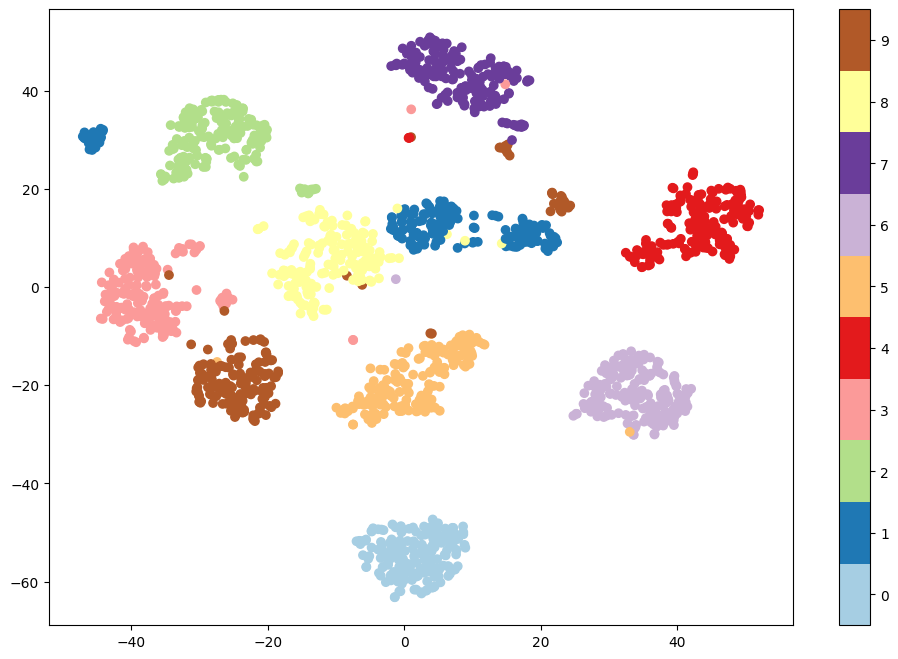

In [39]:
%matplotlib inline
from sklearn.manifold import TSNE

digits = load_digits()
tsne = TSNE(n_components=2, random_state=0)
tsne_digits = tsne.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_digits[:, 0], tsne_digits[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

Ви можете побачити, що t-SNE краще розділяє групи цифр на кластери, що вказує на наявність у даних закономірностей, які може використовувати машинне навчання.

Головний **недолік** полягає в тому, що t-SNE є обчислювально інтенсивним, що означає, що його виконання на великих наборах даних може зайняти надто багато часу. Один зі способів пом'якшити це - запускати t-SNE на *підмножині* рядків, а не на всьому наборі даних. Інша стратегія полягає у використанні PCA (метод головних компонент) для зменшення кількості вимірів, а потім застосуванні t-SNE до набору даних після PCA.